In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.dtypes # type check

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# EDA

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Filtering

In [5]:
df['fixed acidity']  # Return as Series when singe []

0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
        ... 
1594     6.2
1595     5.9
1596     6.3
1597     5.9
1598     6.0
Name: fixed acidity, Length: 1599, dtype: float64

In [6]:
df[['fixed acidity']] # two [[]], return as dataframe or list of list

,fixed acidity
0,7.4
1,7.8
2,7.8
3,11.2
4,7.4
...,...
1594,6.2
1595,5.9
1596,6.3
1597,5.9


In [7]:
# Showing mutiple "COLUMN" as per necessary
df [['fixed acidity', 'density', 'quality']]   # misddle value shown as ... later we will see how to see as full

,fixed acidity,density,quality
0,7.4,0.99780,5
1,7.8,0.99680,5
2,7.8,0.99700,5
3,11.2,0.99800,6
4,7.4,0.99780,5
...,...,...,...
1594,6.2,0.99490,5
1595,5.9,0.99512,6
1596,6.3,0.99574,6
1597,5.9,0.99547,5


In [8]:
# Test1: Check Spefic "ROW" as requrired or with any condition
df [df['fixed acidity'] > 9]  # Check when fixed acidity > 9; syntax df inside df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
56,10.2,0.42,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63,9.6,5
68,9.3,0.32,0.57,2.0,0.074,27.0,65.0,0.99690,3.28,0.79,10.7,5
74,9.7,0.32,0.54,2.5,0.094,28.0,83.0,0.99840,3.28,0.82,9.6,5
88,9.3,0.39,0.44,2.1,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1470,10.0,0.69,0.11,1.4,0.084,8.0,24.0,0.99578,2.88,0.47,9.7,5
1474,9.9,0.50,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
1476,9.9,0.50,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
1543,11.1,0.44,0.42,2.2,0.064,14.0,19.0,0.99758,3.25,0.57,10.4,6


In [9]:
# Test 2
df [(df['fixed acidity'] > 9) & (df['citric acid'] > 0.5)]  # Multiple condition over row, more condtion can be added inside parenthesis

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
56,10.2,0.42,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63,9.6,5
68,9.3,0.32,0.57,2.0,0.074,27.0,65.0,0.99690,3.28,0.79,10.7,5
74,9.7,0.32,0.54,2.5,0.094,28.0,83.0,0.99840,3.28,0.82,9.6,5
151,9.2,0.52,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1221,10.9,0.32,0.52,1.8,0.132,17.0,44.0,0.99734,3.28,0.77,11.5,6
1319,9.1,0.76,0.68,1.7,0.414,18.0,64.0,0.99652,2.90,1.33,9.1,6
1414,10.0,0.32,0.59,2.2,0.077,3.0,15.0,0.99940,3.20,0.78,9.6,5
1416,10.0,0.32,0.59,2.2,0.077,3.0,15.0,0.99940,3.20,0.78,9.6,5


In [10]:
df [(df['fixed acidity'] > 9) & (df['citric acid'] > 0.5) & (df['pH'] >=3)]  # Test 3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
56,10.2,0.42,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63,9.6,5
68,9.3,0.32,0.57,2.0,0.074,27.0,65.0,0.99690,3.28,0.79,10.7,5
74,9.7,0.32,0.54,2.5,0.094,28.0,83.0,0.99840,3.28,0.82,9.6,5
197,11.5,0.30,0.60,2.0,0.067,12.0,27.0,0.99810,3.11,0.97,10.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1220,10.9,0.32,0.52,1.8,0.132,17.0,44.0,0.99734,3.28,0.77,11.5,6
1221,10.9,0.32,0.52,1.8,0.132,17.0,44.0,0.99734,3.28,0.77,11.5,6
1414,10.0,0.32,0.59,2.2,0.077,3.0,15.0,0.99940,3.20,0.78,9.6,5
1416,10.0,0.32,0.59,2.2,0.077,3.0,15.0,0.99940,3.20,0.78,9.6,5


In [11]:
# In case of row wise selection, its returning all
df [(df['fixed acidity'] > 9) | (df['citric acid'] > 0.5)]  # Or Function

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7
19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
47,8.7,0.29,0.52,1.6,0.113,12.0,37.0,0.99690,3.25,0.58,9.5,5
56,10.2,0.42,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63,9.6,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1548,11.2,0.40,0.50,2.0,0.099,19.0,50.0,0.99783,3.10,0.58,10.4,5
1566,6.7,0.16,0.64,2.1,0.059,24.0,52.0,0.99494,3.34,0.71,11.2,6
1570,6.4,0.36,0.53,2.2,0.230,19.0,35.0,0.99340,3.37,0.93,12.4,6
1574,5.6,0.31,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,6


In [12]:
# Row Wise File - with only selective columns as per condtion
df.loc[df['fixed acidity'] == 9.2, ['fixed acidity', 'citric acid', 'pH']]  # syntax: loc means, we are locationg, then condtion as ==9.2 & name of col as want to show
# as per given condtion, the total retunr number / qnt not show, we can see it as next code

,fixed acidity,citric acid,pH
151,9.2,1.00,2.74
457,9.2,0.21,3.28
460,9.2,0.52,3.35
491,9.2,0.50,3.34
524,9.2,0.49,3.23
540,9.2,0.24,3.26
614,9.2,0.18,2.87
691,9.2,0.24,3.48
741,9.2,0.24,3.21
765,9.2,0.10,3.31


In [13]:
data = df.loc[df['fixed acidity'] == 9.2, ['fixed acidity', 'citric acid', 'pH']]  # just bring the previous code in a var and see the shape
data.shape

(16, 3)

In [14]:
df.tail(7)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [15]:
df[5:11] # want to see from index 5 to 10

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5


#### View Full Rows & Column,  middle ... will not be shown

In [16]:
# Required codes for see full, but its not recommended actually or no needed
# pd.set_option('display.max_rows',None)
# pd.set_option('display.max_columns', None)
# df

## Processed File Export

In [17]:
# x = df [(df['fixed acidity'] > 9) | (df['citric acid'] > 0.5)]   # processed file stored into a variable file as x
# x.to_csv('1007_processedfile.csv')

# Visualization

#### Very basic or Ordinary Visualization

<AxesSubplot:>

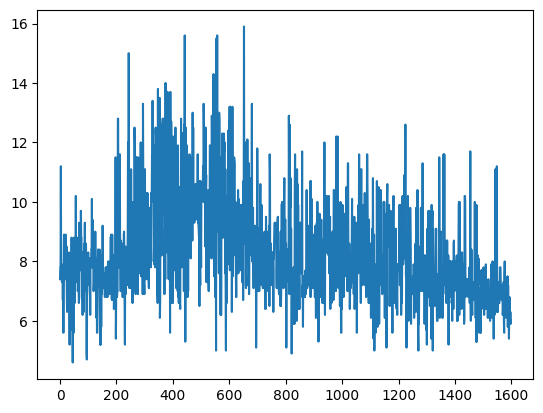

In [18]:
# Plot with a single columns
df['fixed acidity'].plot.line()

<AxesSubplot:>

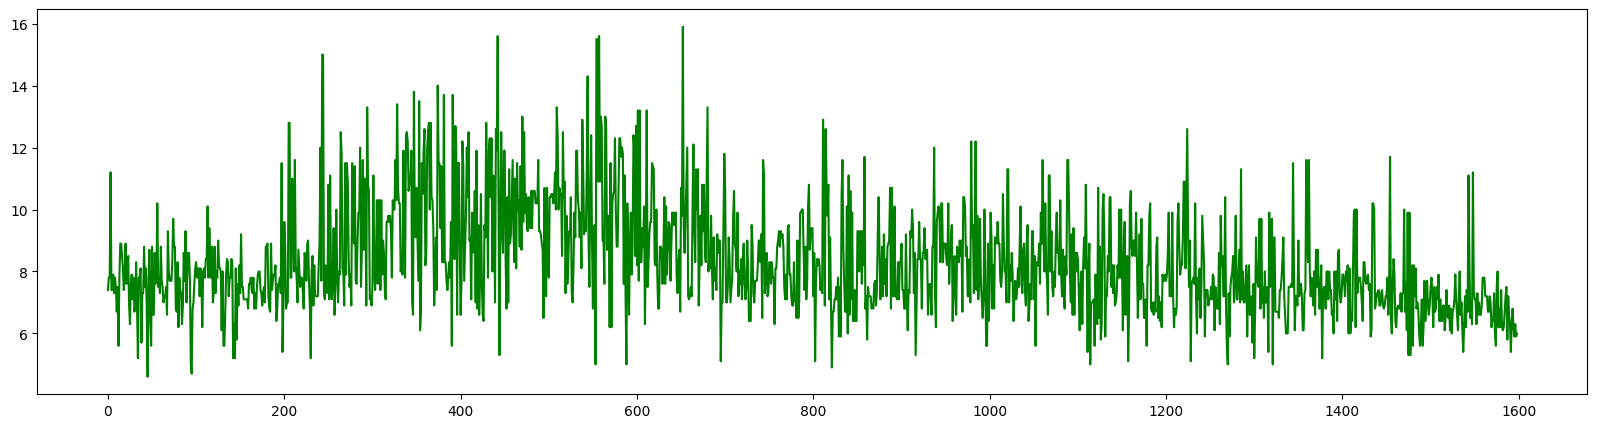

In [19]:
df['fixed acidity'].plot.line(figsize =(20,5), color='green')

# Better Visualization

## Seaborn

In [20]:
import seaborn as sns

- There is Negative Relationship between Acidity & Ph, lets visualize the relationship between these two
- Sns lineplot must require independent & dependent variable, here x is indendendent & y is dependent over x

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

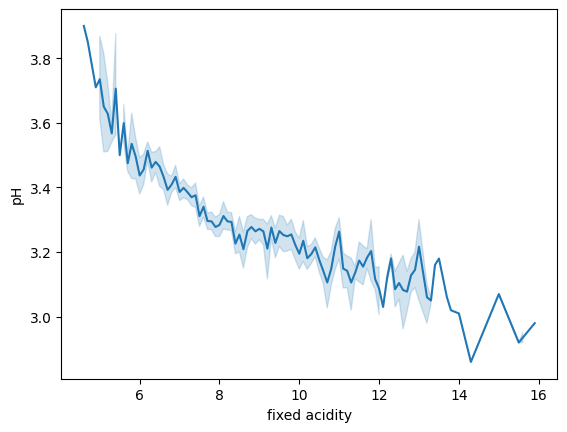

In [21]:
sns.lineplot(data=df, x='fixed acidity', y='pH')

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

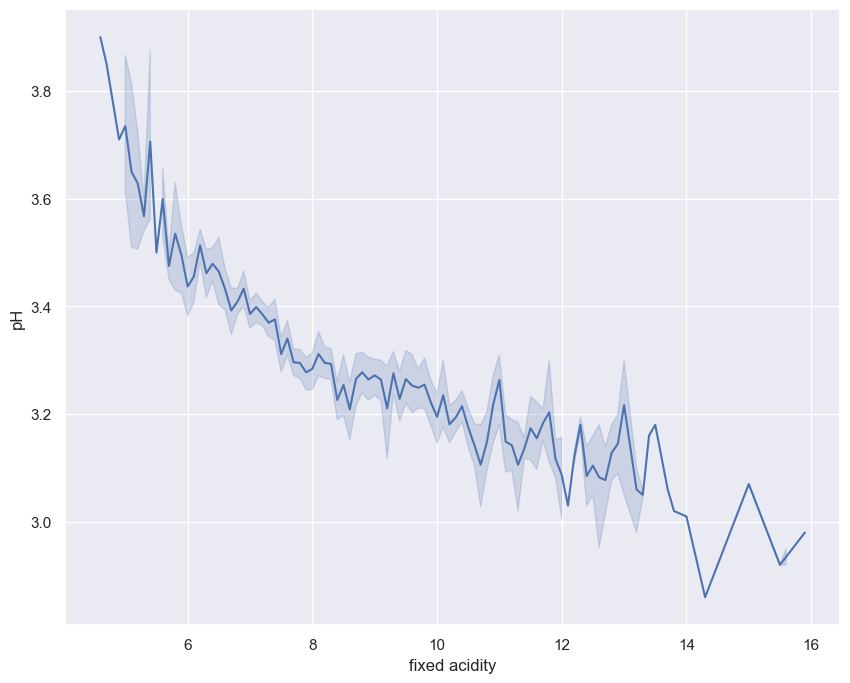

In [32]:
# Figure Size Customization
sns.set(rc={'figure.figsize':(10, 8)})
sns.lineplot(data=df, x='fixed acidity', y='pH') 
# The shadow represent the deviation / standard deviation / error rate or how much deviation is there

### Categorical Data Visualization

- Male / Famale type
- In this dataset, quality is categorical data
- Event
- By the category you want to represent data, that must be passed in "hue"
- Checking Facebook traffic for day & night 

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

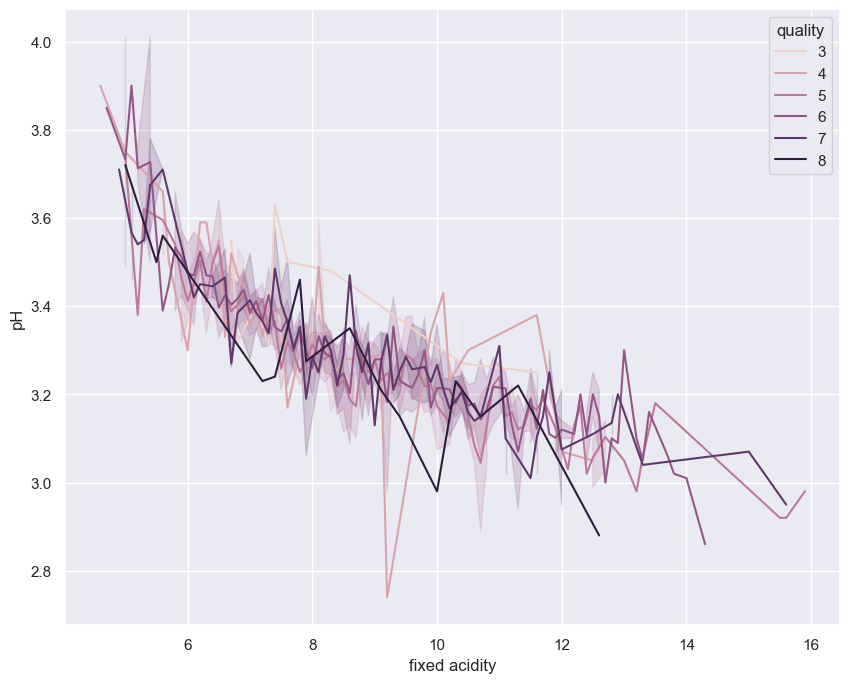

In [34]:
sns.lineplot(data=df, x='fixed acidity', y='pH', hue='quality')  # We have 6 type of category

## Color Customization

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

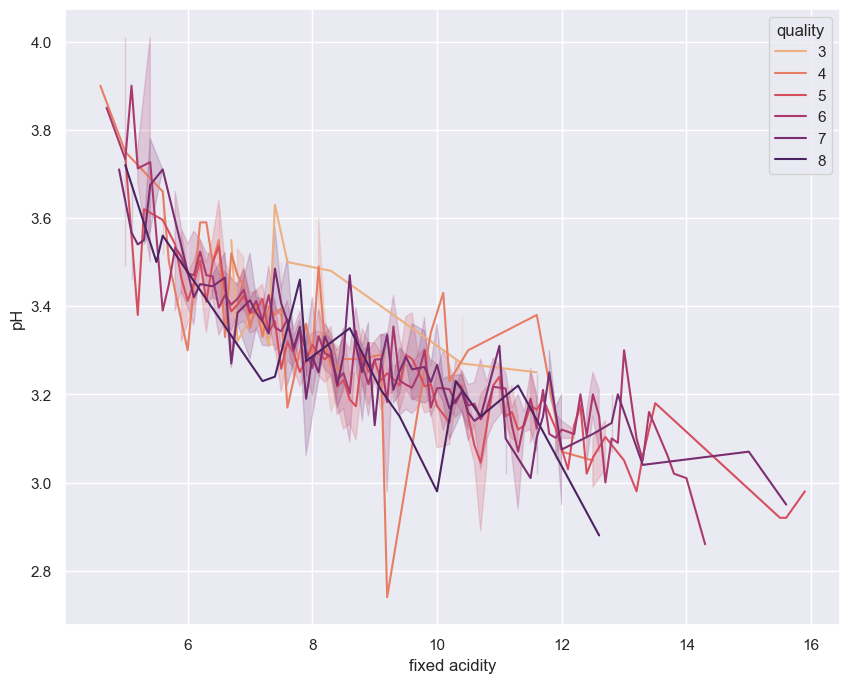

In [36]:
p = sns.color_palette("flare", as_cmap=True)  # customized color palette stored in p & then pass to following code for color customization
sns.lineplot(data=df, x='fixed acidity', y='pH', hue='quality', palette=p)  

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

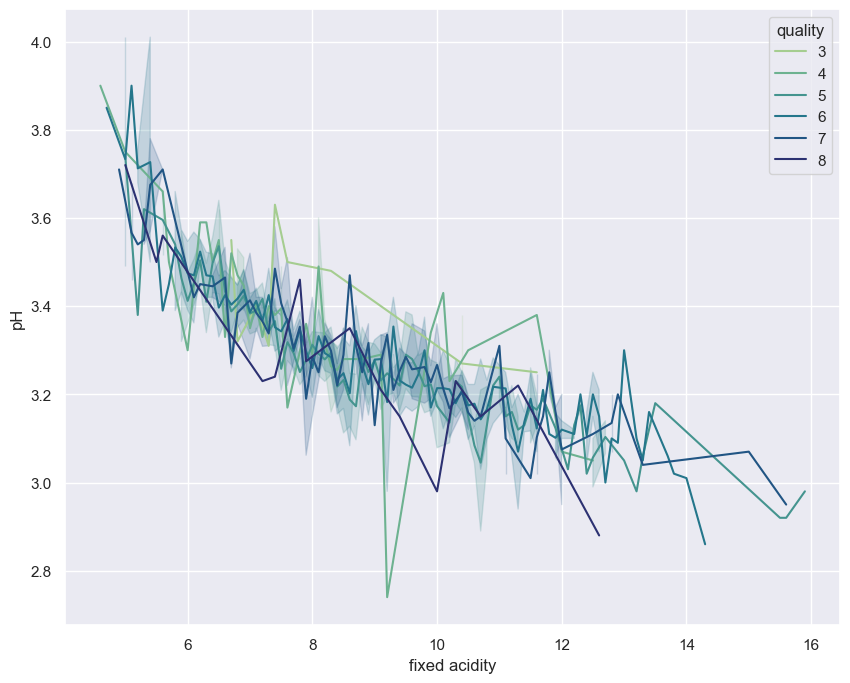

In [38]:
p = sns.color_palette("crest", as_cmap=True)  # Another color palette
sns.lineplot(data=df, x='fixed acidity', y='pH', hue='quality', palette=p)  

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

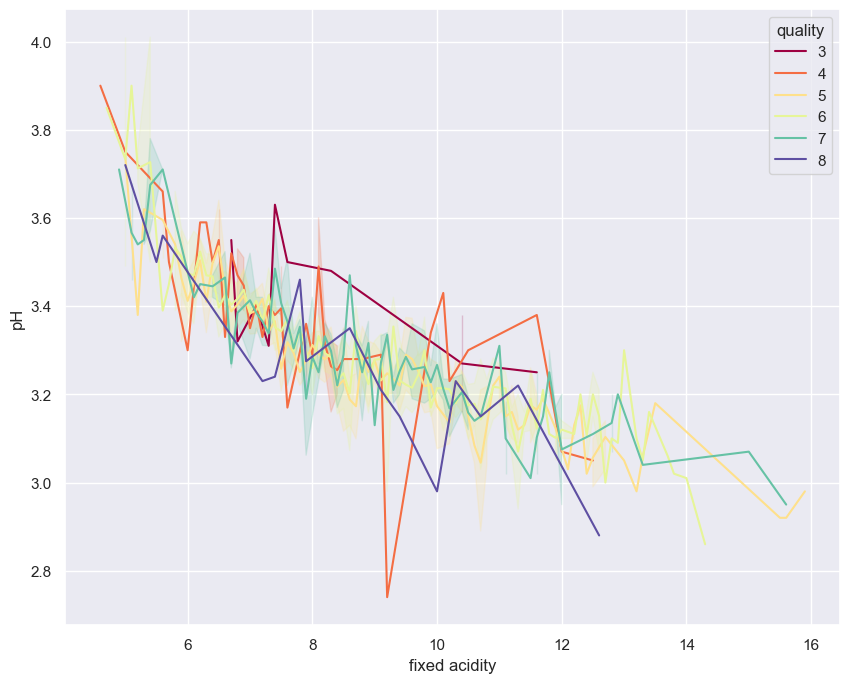

In [39]:
p = sns.color_palette("Spectral", as_cmap=True)  # Another color palette
sns.lineplot(data=df, x='fixed acidity', y='pH', hue='quality', palette=p)  

## Creationg New Dataset for Visualization

In [52]:
df2 = [[ 'Alice', 30, 'Male', 55 ], ['Bobe', 17,'Female', 25 ], ['Jeba', 11, 'Female', 12], ['Tom', 45,'Male', 72], ['Rita', 21, 'Female', 35], ['Jackline', 51, 'Female', 65], ['Peter', 55, 'Male', 72]]
df2 = pd.DataFrame(df2, columns=['Name', 'Age', 'Gender','Weight in KG'])  # Column declaration
df2

,Name,Age,Gender,Weight in KG
0,Alice,30,Male,55
1,Bobe,17,Female,25
2,Jeba,11,Female,12
3,Tom,45,Male,72
4,Rita,21,Female,35
5,Jackline,51,Female,65
6,Peter,55,Male,72


- We will see a visualization for Age & Weight in respect of Gender
- More Application: facebook traffic day & night

<AxesSubplot:xlabel='Age', ylabel='Weight in KG'>

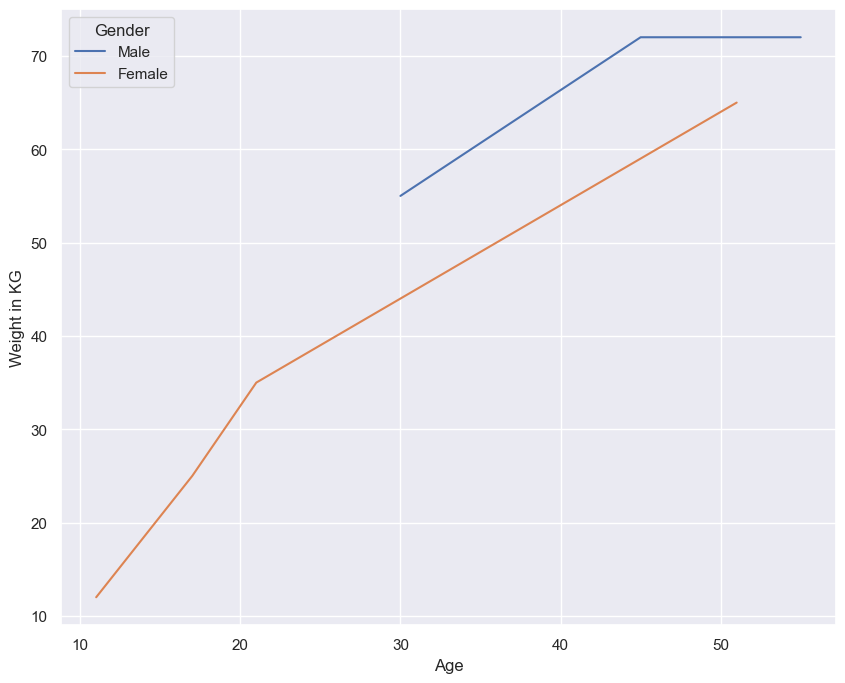

In [55]:
sns.lineplot(data=df2, x='Age', y='Weight in KG', hue='Gender')  # hue param is usefull when divided by category

## Creating Test Data

In [60]:
tips = [
    [16.99, 1.01, 'Female', 'No', 'Sun', 'Dinner', 2],
    [10.34, 1.66, 'Male', 'No', 'Sun', 'Dinner', 3],
    [21.01, 3.50, 'Male', 'No', 'Sun', 'Dinner', 3],
    [23.65, 3.50, 'Male', 'No', 'Mon', 'Dinner', 4],
    [24.59, 3.61, 'Female', 'No', 'Sun', 'Dinner', 3],
]
tips = pd.DataFrame(data=tips, columns=['Total Bill', 'Tips','Gender', 'Smoker', 'Day', 'Time', 'Size'])
tips

,Total Bill,Tips,Gender,Smoker,Day,Time,Size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.65,3.50,Male,No,Mon,Dinner,4
4,24.59,3.61,Female,No,Sun,Dinner,3


In [64]:
# Alternative Way for Dataset creation with seperate col
tips2 = [
    [16.99, 1.01, 'Female', 'No', 'Sun', 'Dinner', 2],
    [10.34, 1.66, 'Male', 'No', 'Sun', 'Dinner', 3],
    [21.01, 3.50, 'Male', 'No', 'Sun', 'Dinner', 3],
    [23.65, 3.50, 'Male', 'No', 'Mon', 'Dinner', 4],
    [24.59, 3.61, 'Female', 'No', 'Sun', 'Dinner', 3],
]
c = ['Total Bill', 'Tips','Gender', 'Smoker', 'Day', 'Time', 'Size']   # Just keep a column var as c & keep the col name here
tips2 = pd.DataFrame(data=tips, columns= c )  # Pass the c here
tips2

,Total Bill,Tips,Gender,Smoker,Day,Time,Size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.65,3.50,Male,No,Mon,Dinner,4
4,24.59,3.61,Female,No,Sun,Dinner,3


<AxesSubplot:xlabel='Total Bill', ylabel='Tips'>

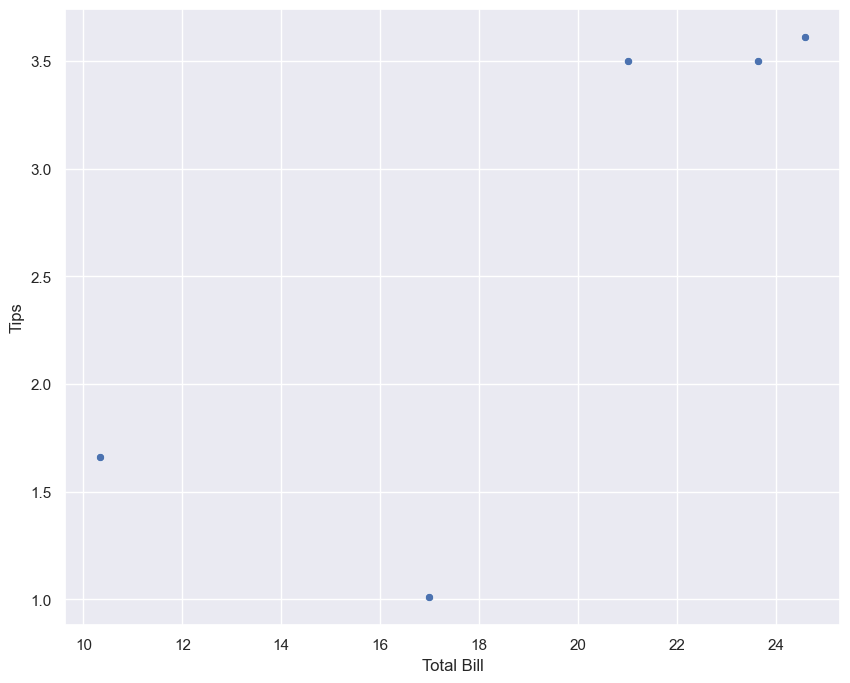

In [65]:
sns.scatterplot(data=tips, x='Total Bill', y='Tips')

In [71]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [74]:
tips.shape

(244, 7)

### Line Plot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

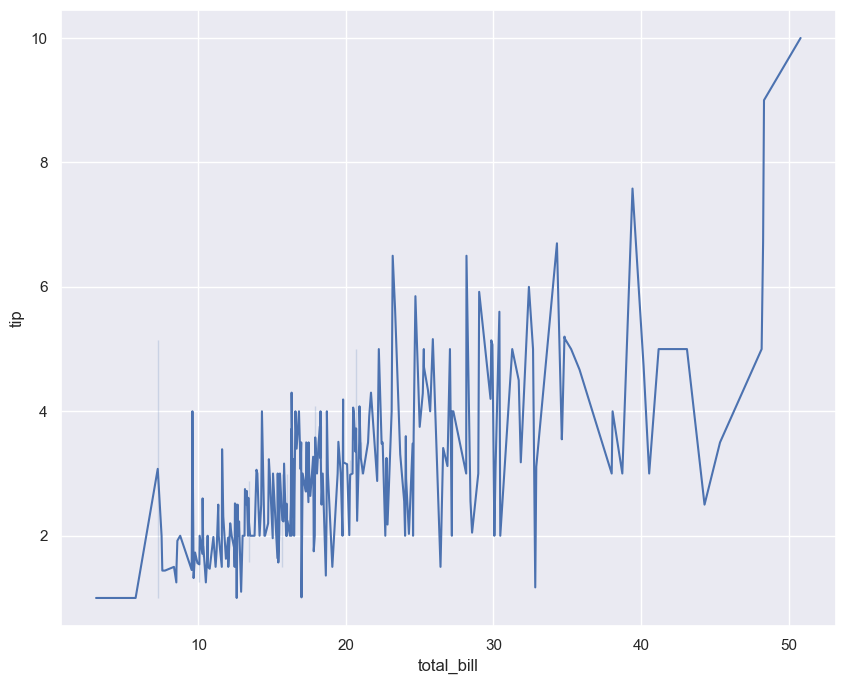

In [75]:
sns.lineplot(data=tips, x='total_bill', y='tip')

### Scatter plot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

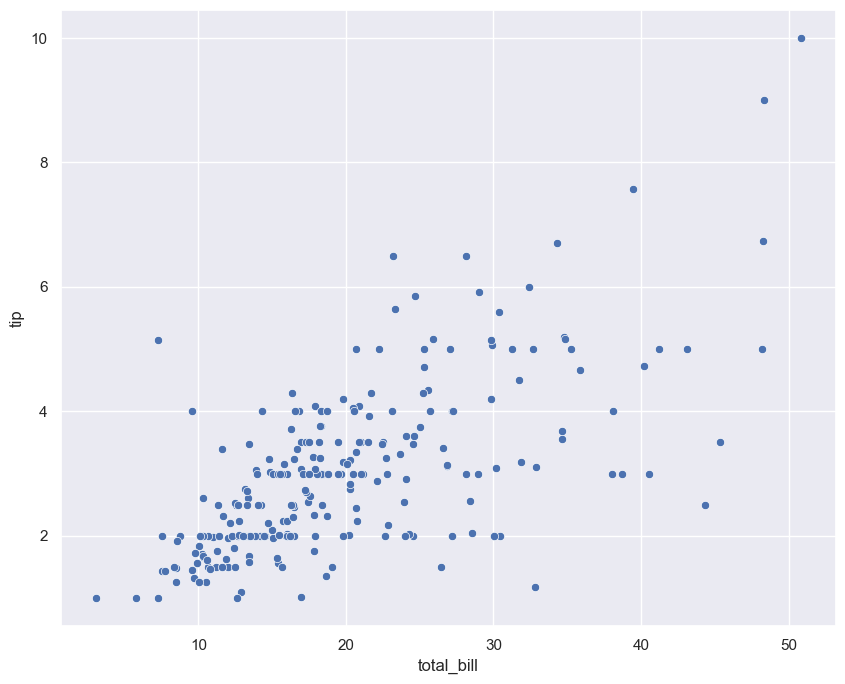

In [73]:
sns.scatterplot(data=tips, x='total_bill', y='tip')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

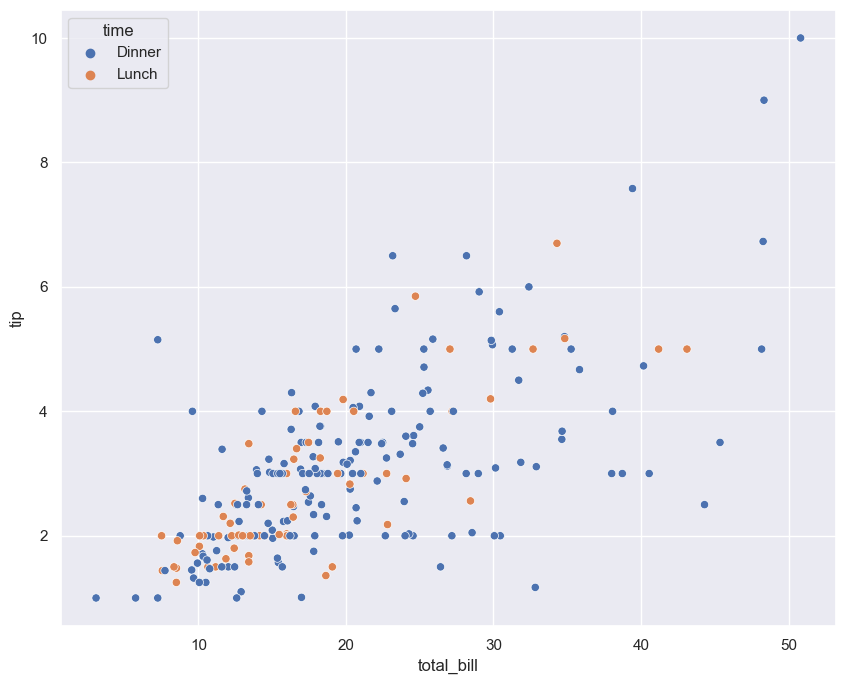

In [76]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

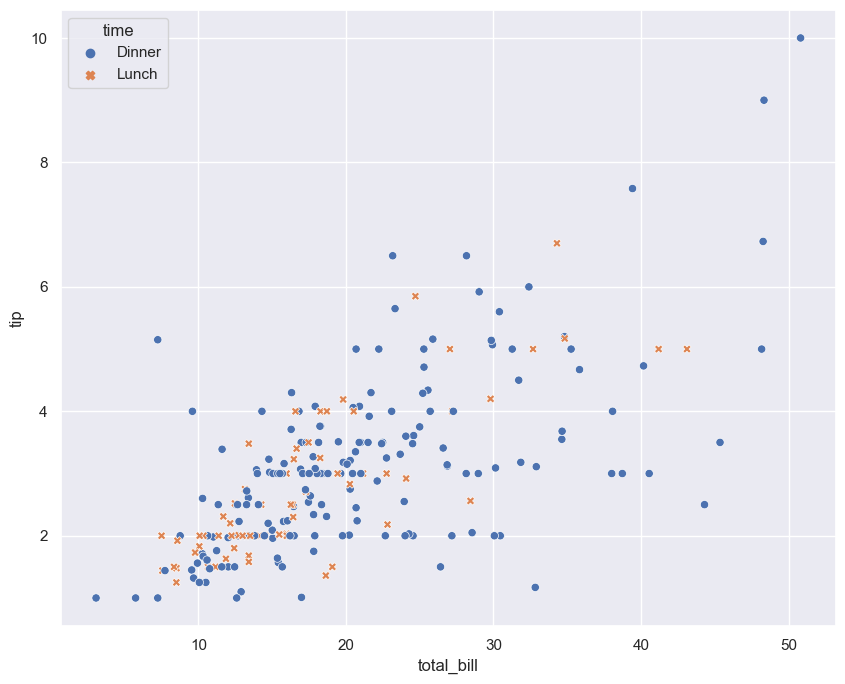

In [77]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', style='time')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

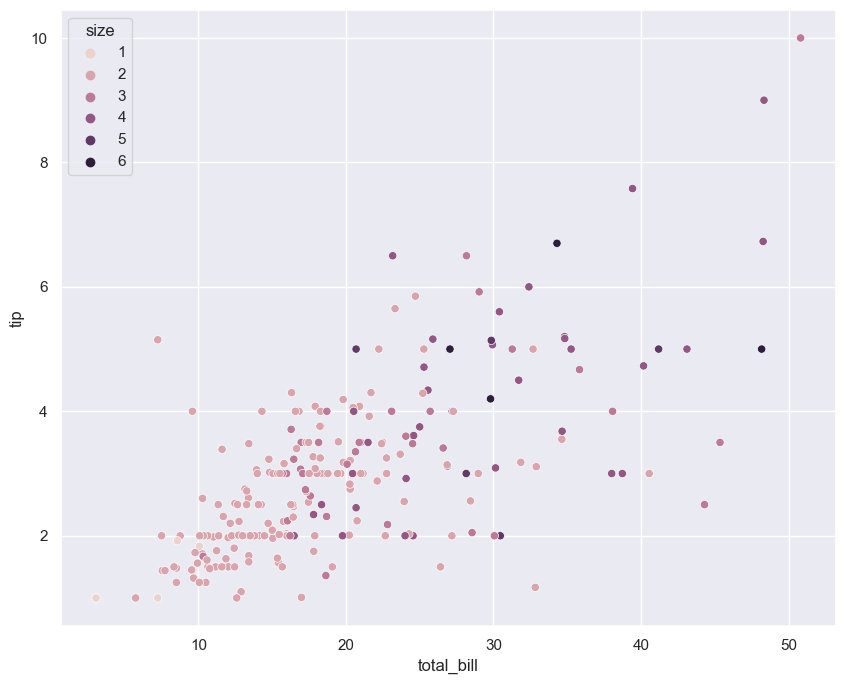

In [78]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='size')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

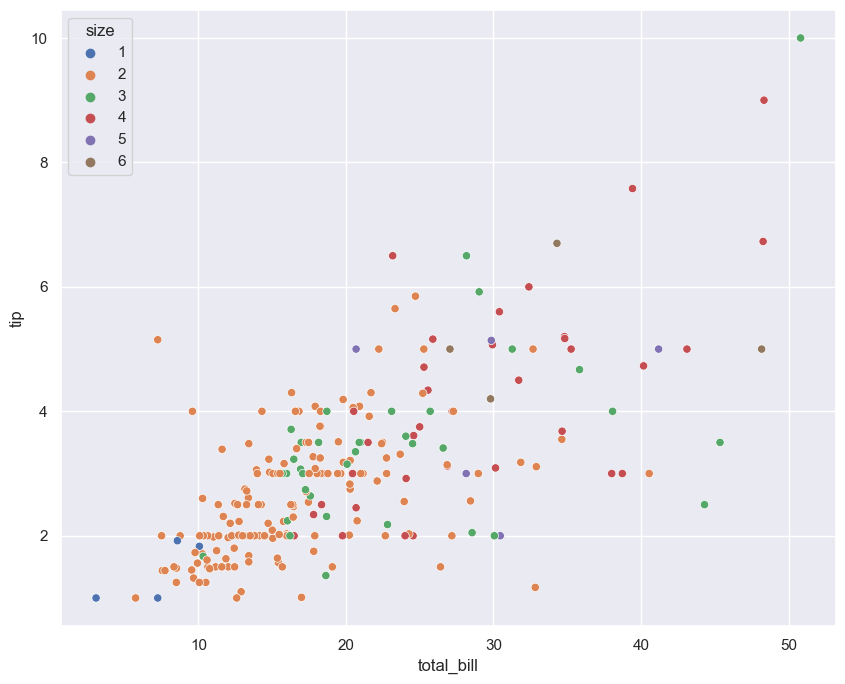

In [79]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='size', palette="deep")

### Tip rate

- If there are a large number of unique numeric values, the legend will show a representative, evenly-spaced set:

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

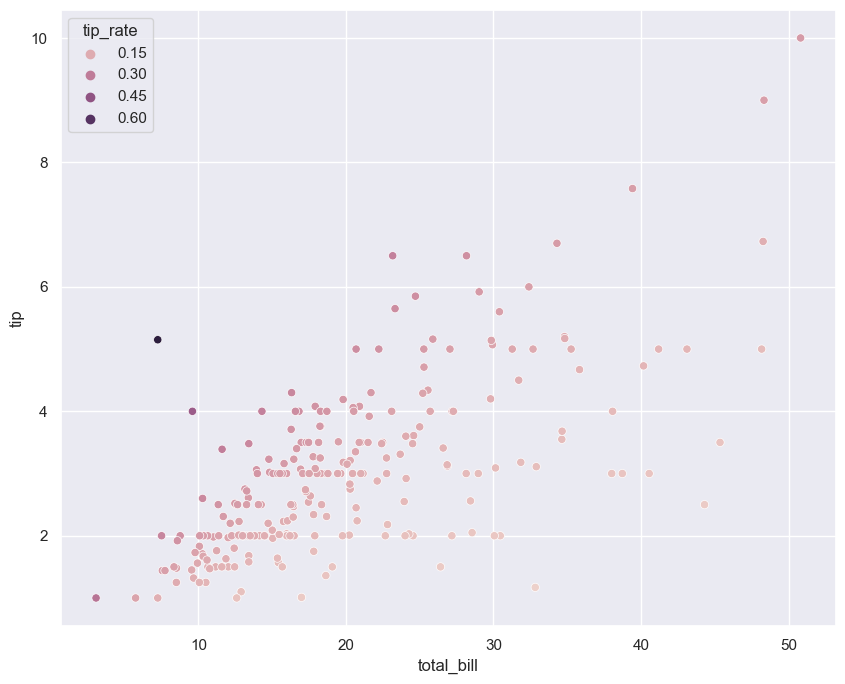

In [84]:
tip_rate = tips.eval("tip / total_bill").rename("tip_rate")
sns.scatterplot(data=tips, x="total_bill", y="tip", hue=tip_rate)

- A numeric variable can also be assigned to size to apply a semantic mapping to the areas of the points:

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

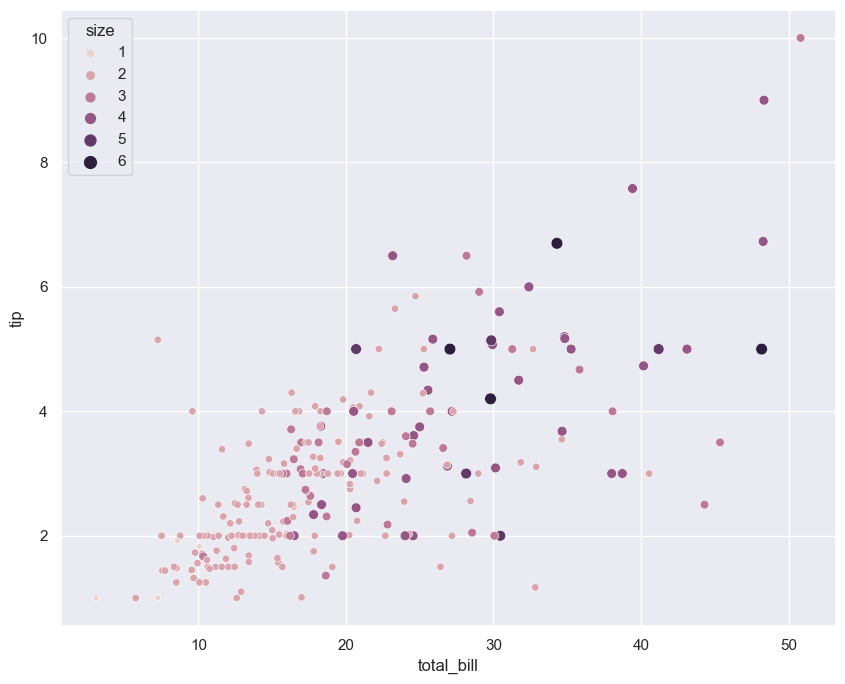

In [85]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='size', size="size")

- Control the range of marker areas with sizes, and set lengend="full" to force every unique value to appear in the legend:

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

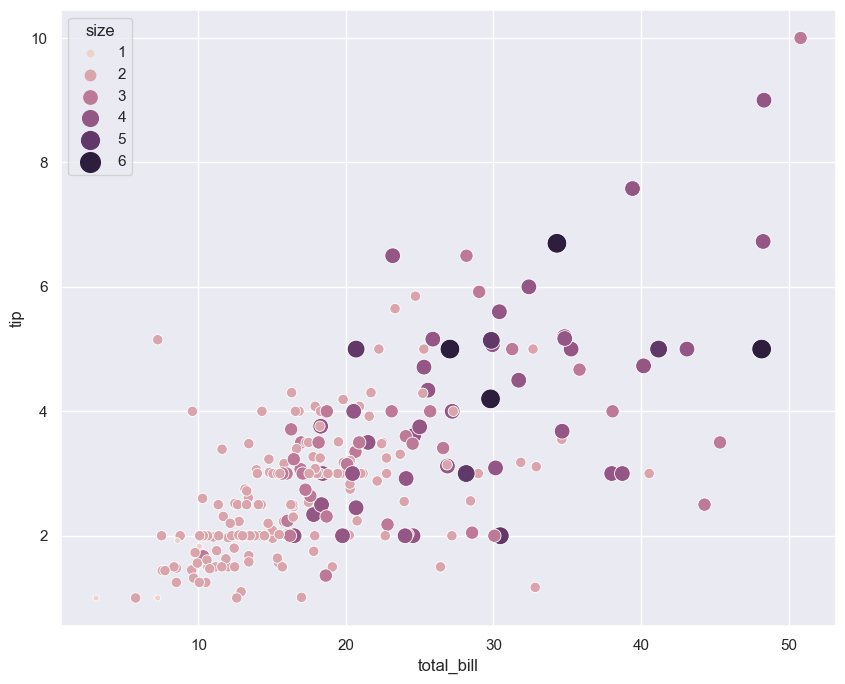

In [86]:
sns.scatterplot(
    data=tips, x="total_bill", y="tip", hue="size", size="size",
    sizes=(20, 200), legend="full"
)

- Pass a tuple of values or a matplotlib.colors.Normalize object to hue_norm to control the quantitative hue mapping:

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

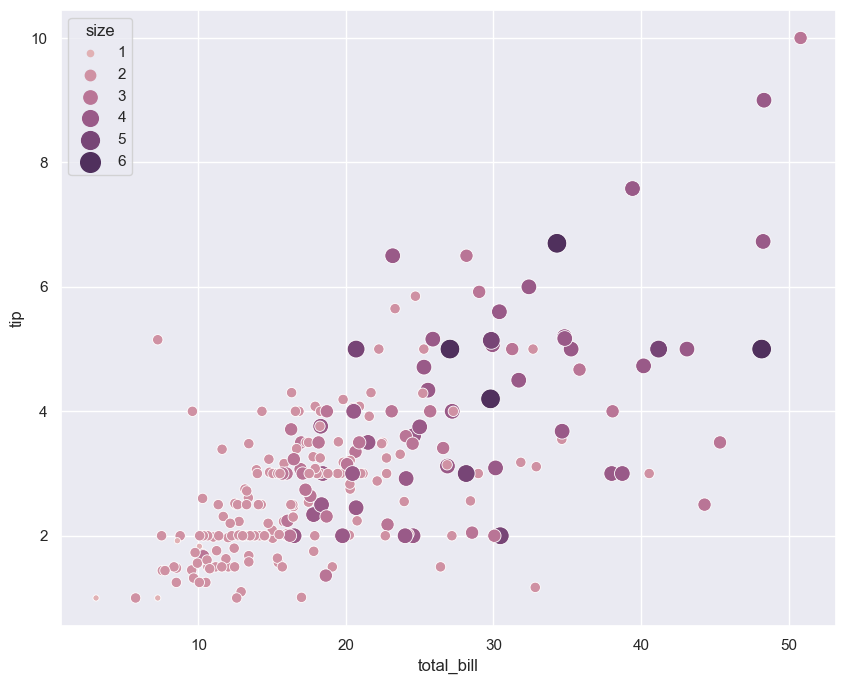

In [87]:
sns.scatterplot(
    data=tips, x="total_bill", y="tip", hue="size", size="size",
    sizes=(20, 200), hue_norm=(0, 7), legend="full"
)

- Control the specific markers used to map the style variable by passing a Python list or dictionary of marker codes:

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

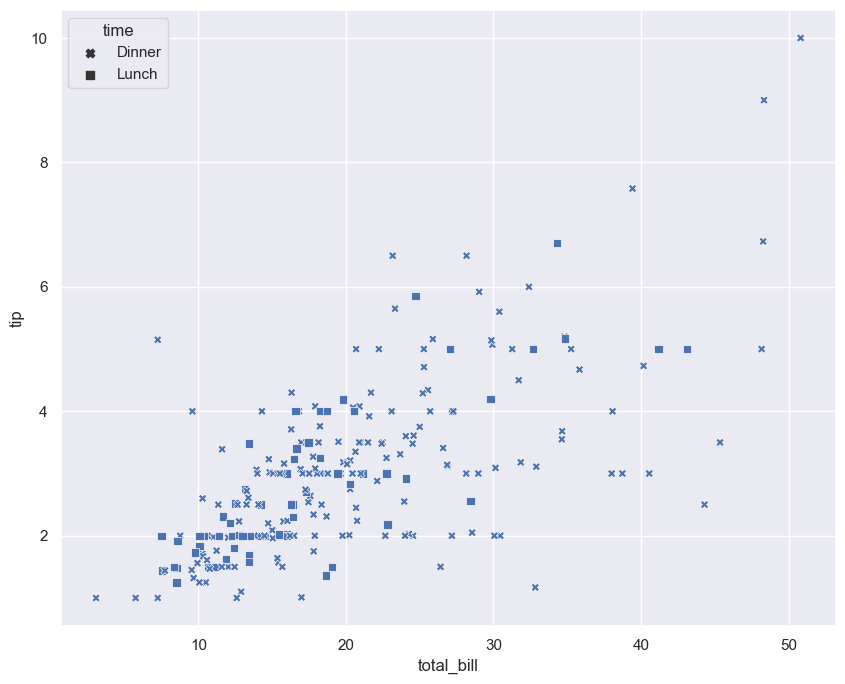

In [88]:
markers = {"Lunch": "s", "Dinner": "X"}
sns.scatterplot(data=tips, x="total_bill", y="tip", style="time", markers=markers)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

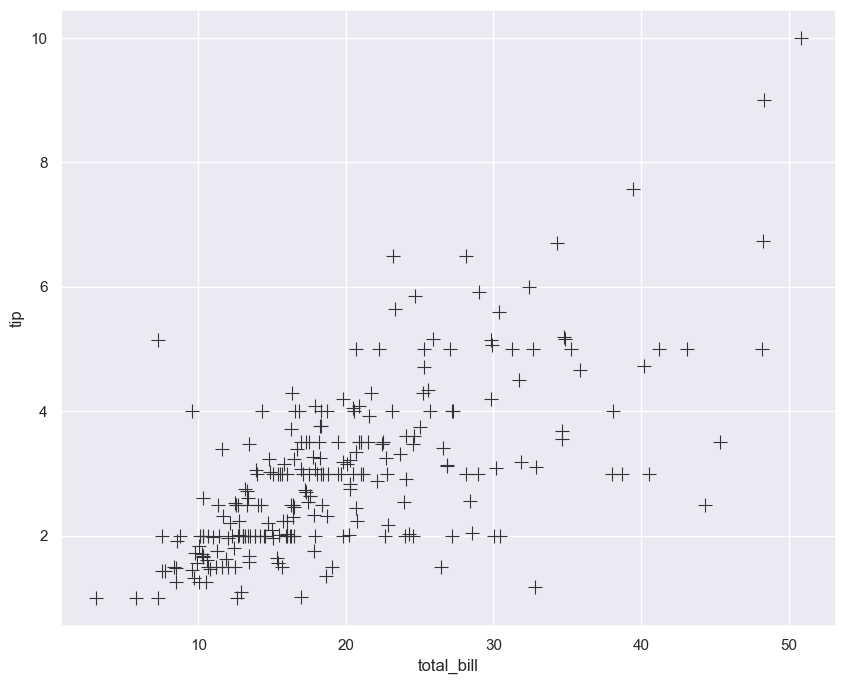

In [89]:
sns.scatterplot(data=tips, x="total_bill", y="tip", s=100, color=".2", marker="+")

<AxesSubplot:xlabel='date'>

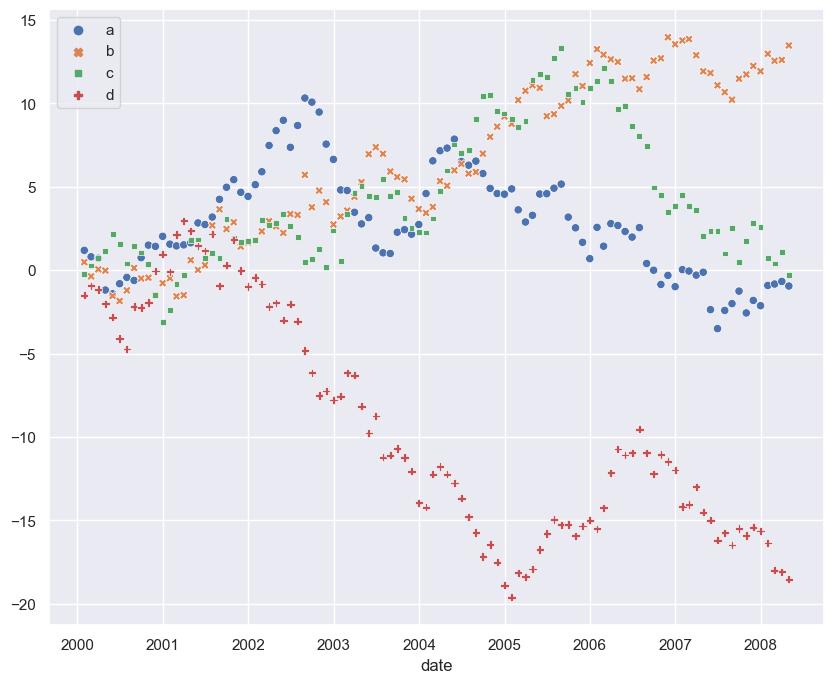

In [90]:
index = pd.date_range("1 1 2000", periods=100, freq="m", name="date")
data = np.random.randn(100, 4).cumsum(axis=0)
wide_df = pd.DataFrame(data, index, ["a", "b", "c", "d"])
sns.scatterplot(data=wide_df)

- Use relplot() to combine scatterplot() and FacetGrid. This allows grouping within additional categorical variables, and plotting them across multiple subplots.
- Using relplot() is safer than using FacetGrid directly, as it ensures synchronization of the semantic mappings across facets.

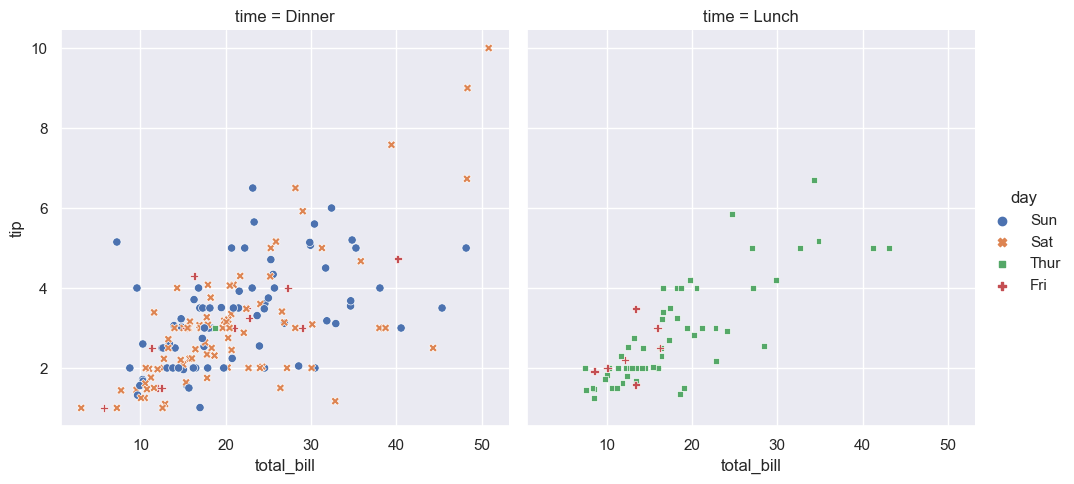

In [91]:
sns.relplot(
    data=tips, x="total_bill", y="tip",
    col="time", hue="day", style="day",
    kind="scatter"
)

In [93]:
# https://pandas.pydata.org/docs/user_guide/10min.html   # ***